<a href="https://colab.research.google.com/github/jawametal234/Week6/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

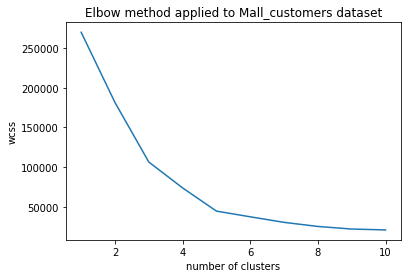

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values

#Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []

#Iterating over 1, 2, 3, ---- 10 clusters
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) # intertia_ is an attribute that has the wcss number
plt.plot(range(1,11), wcss)
plt.title("Elbow method applied to Mall_customers dataset")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
# Apply kmeans to the dataset
kmeans = KMeans(n_clusters = 5, max_iter = 300, init = 'k-means++', n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x) #predict which cluster each point belongs to
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

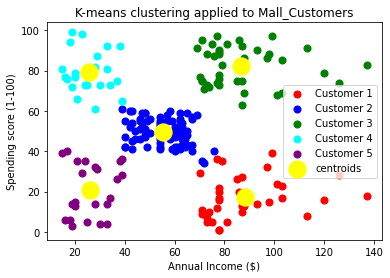

In [ ]:
plt.figure(2)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Customer 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = 'purple', label = 'Customer 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to Mall_Customers")
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

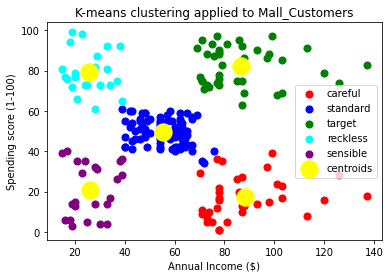

In [ ]:
plt.figure(3)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'careful')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'standard')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'target')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'reckless')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = 'purple', label = 'sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to Mall_Customers")
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

Type 2 Divisive

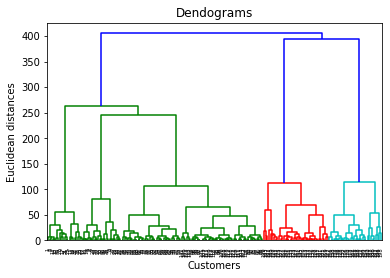

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values
# y is not available, as we do not know the patterns we expect. It's our job to find patterns from x.

#Use dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram_1 = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendograms')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

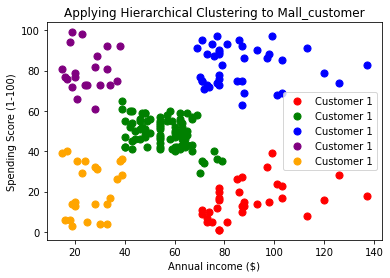

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'red', label = 'Customer 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'green', label = 'Customer 1')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'blue', label = 'Customer 1')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'purple', label = 'Customer 1')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange', label = 'Customer 1')
plt.title('Applying Hierarchical Clustering to Mall_customer')
plt.xlabel('Annual income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()